<a href="https://colab.research.google.com/github/Iamjohnko/Data-science-Project-Portfolio/blob/main/PREDICTING_BLACK_MARKET_SALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [ ]:
train.shape

(22589, 12)

In [ ]:
train.describe().T #summary statistics test

,count,mean,std,min,25%,50%,75%,max
User_ID,22589.0,1.001754e+06,1014.404177,1000001.0,1000911.0,1001701.0,1002643.00,1003539.0
Occupation,22588.0,8.271826e+00,6.548196,0.0,3.0,7.0,14.00,20.0
Marital_Status,22588.0,4.013193e-01,0.490176,0.0,0.0,0.0,1.00,1.0
Product_Category_1,22588.0,5.303081e+00,3.687217,1.0,1.0,5.0,8.00,18.0
Product_Category_2,15374.0,9.865032e+00,5.071523,2.0,5.0,9.0,15.00,18.0
Product_Category_3,6786.0,1.273578e+01,4.112731,3.0,9.0,15.0,16.00,18.0
Purchase,22588.0,9.241597e+03,4930.665788,186.0,5848.0,8045.0,11989.25,23958.0


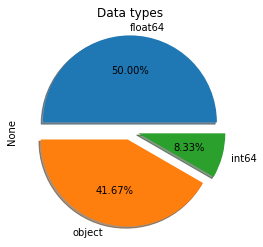

In [ ]:
train.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('Data types');

In [ ]:
train.isna()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
22584,False,False,False,False,False,False,False,False,False,False,False,False
22585,False,False,False,False,False,False,False,False,False,True,True,False
22586,False,False,False,False,False,False,False,False,False,False,False,False
22587,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
#train
#FILLING THE MISSING NUMBER

train['Product_Category_2'] = train['Product_Category_2'].fillna(
train['Product_Category_2'].dropna().mean())

In [ ]:
train['Product_Category_3'] = train['Product_Category_3'].fillna(
train['Product_Category_3'].dropna().mean())

In [ ]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,9.865032,12.73578,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.000000,14.00000,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,9.865032,12.73578,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.000000,12.73578,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,9.865032,12.73578,7969.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt
import seaborn as sns

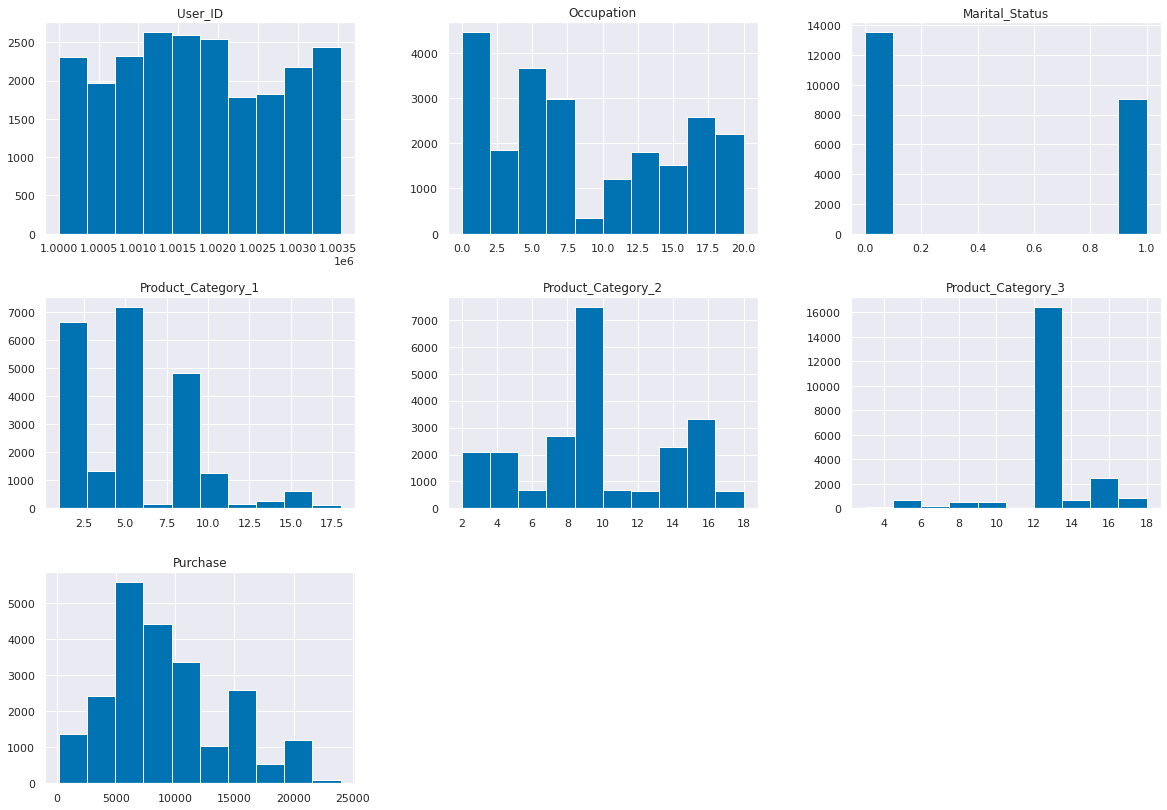

In [ ]:
#default theme
plt.style.use('ggplot')
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
train.hist(figsize=(20,14))
plt.show()

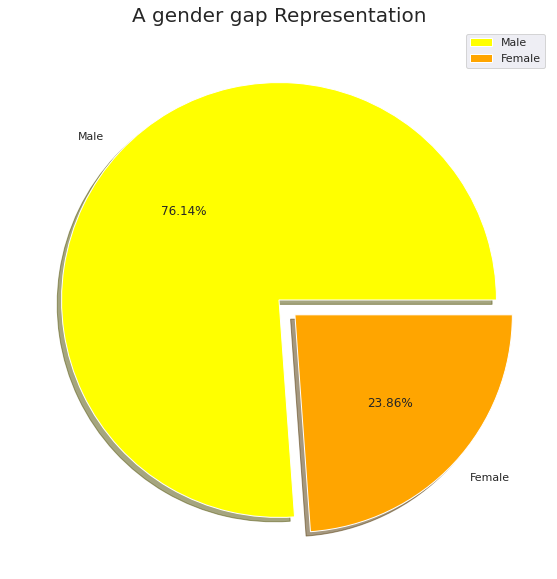

In [ ]:
size = train['Gender'].value_counts()
labels = ['Male', 'Female']
colors = ['Yellow', 'Orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A gender gap Representation', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

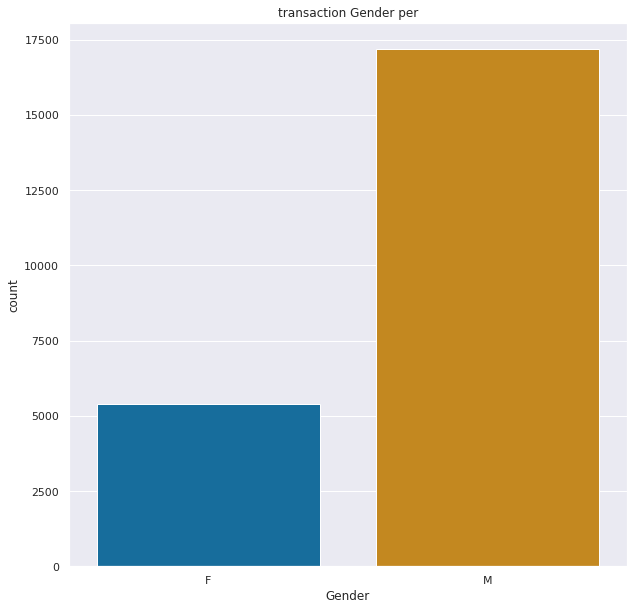

In [ ]:
sns.countplot(x=train.Gender)
plt.title('transaction Gender per');

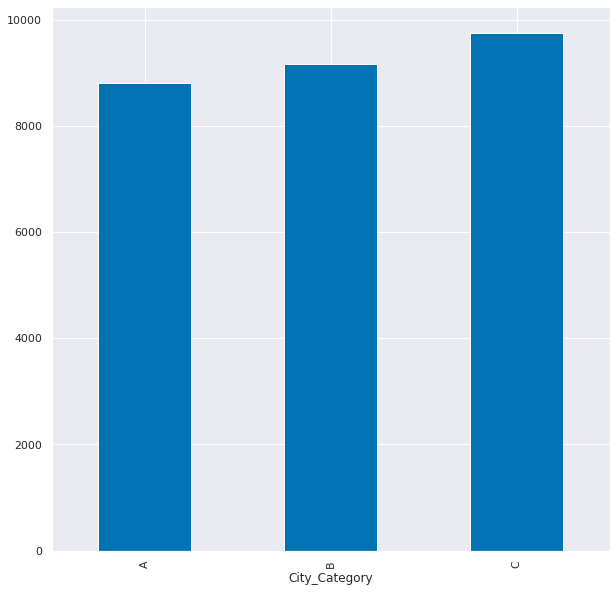

In [ ]:
train.groupby('City_Category')['Purchase'].mean().plot.bar()

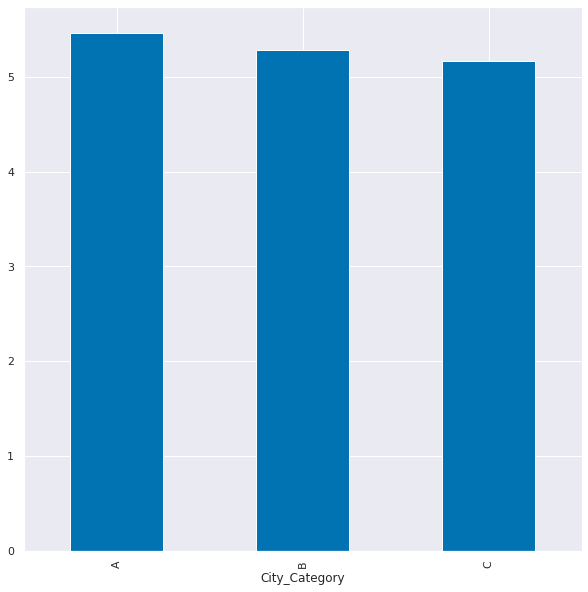

In [ ]:
train.groupby('City_Category')['Product_Category_1'].mean().plot.bar()

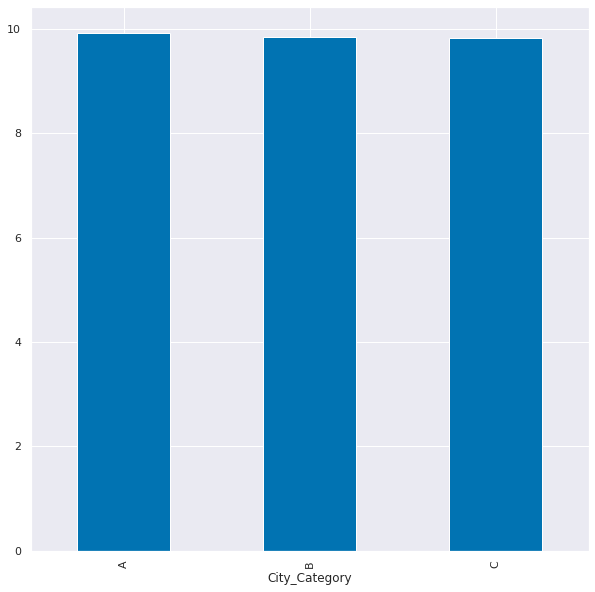

In [ ]:
train.groupby('City_Category')['Product_Category_2'].mean().plot.bar()

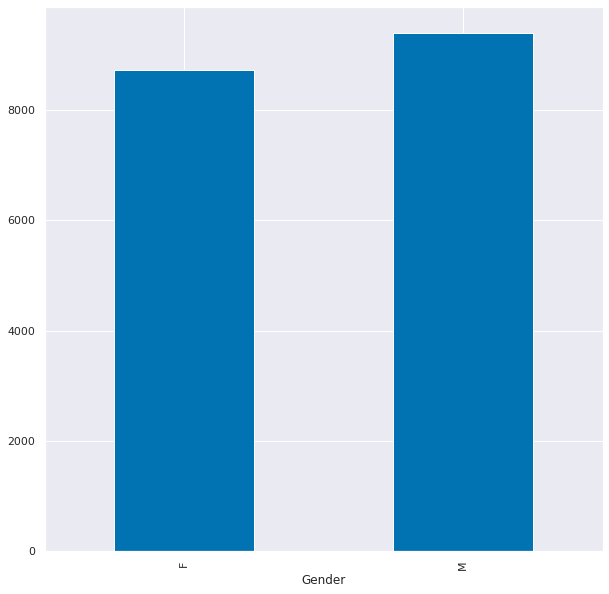

In [ ]:
train.groupby('Gender')['Purchase'].mean().plot.bar()

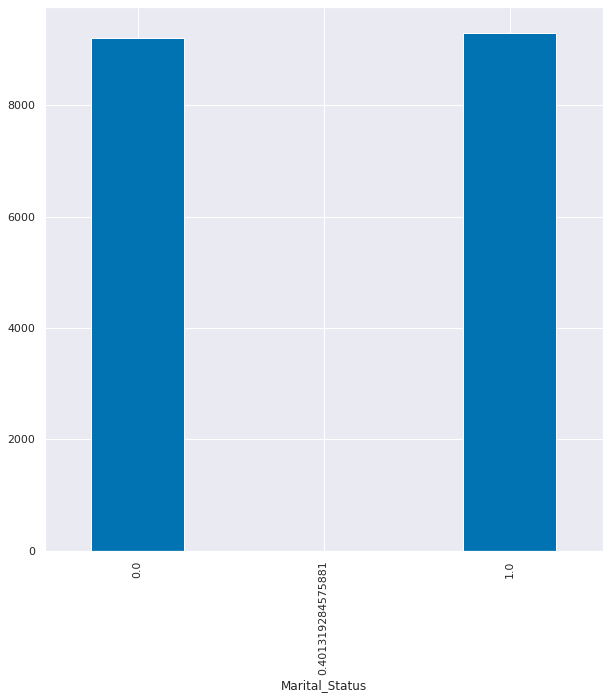

In [ ]:
train.groupby('Marital_Status')['Purchase'].mean().plot.bar()

## label encoding


In [ ]:
train_Gender = pd.get_dummies(train['Gender'])
train_Age = pd.get_dummies(train['Age'])
train_City_Category = pd.get_dummies(train['City_Category'])
train_Stay_In_Current_City_Years = pd.get_dummies(train['Stay_In_Current_City_Years'])

Final_data= pd.concat([train, train_Gender, train_Age, train_City_Category, train_Stay_In_Current_City_Years], axis=1)

Final_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,51-55,55+,A,B,C,0,1,2,3,4+
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,9.865032,...,0,0,1,0,0,0,0,1,0,0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.000000,...,0,0,1,0,0,0,0,1,0,0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,9.865032,...,0,0,1,0,0,0,0,1,0,0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.000000,...,0,0,1,0,0,0,0,1,0,0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,9.865032,...,0,1,0,0,1,0,0,0,0,1


In [ ]:
Final_data = train.drop(['Gender','Age','City_Category','Stay_In_Current_City_Years', 'User_ID', 'Product_ID'],axis=1)

In [ ]:
Final_data.tail()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
22584,4.0,1.0,4.0,5.000000,13.00000,2768.0
22585,4.0,1.0,7.0,9.865032,12.73578,16677.0
22586,4.0,1.0,6.0,10.000000,13.00000,16123.0
22587,4.0,1.0,8.0,13.000000,12.73578,3896.0
22588,NaN,NaN,NaN,9.865032,12.73578,NaN


In [ ]:
Final_data['Occupation'] = Final_data['Occupation'].fillna(
Final_data['Occupation'].dropna().mean())

In [ ]:
Final_data.tail()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
22584,4.000000,1.0,4.0,5.000000,13.00000,2768.0
22585,4.000000,1.0,7.0,9.865032,12.73578,16677.0
22586,4.000000,1.0,6.0,10.000000,13.00000,16123.0
22587,4.000000,1.0,8.0,13.000000,12.73578,3896.0
22588,8.271826,NaN,NaN,9.865032,12.73578,NaN


In [ ]:
Final_data['Product_Category_1'] = Final_data['Product_Category_1'].fillna(
Final_data['Product_Category_1'].dropna().mean())

In [ ]:
Final_data['Marital_Status'] = Final_data['Marital_Status'].fillna(
Final_data['Marital_Status'].dropna().mean())

In [ ]:
Final_data.tail()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
22584,4.000000,1.000000,4.000000,5.000000,13.00000,2768.0
22585,4.000000,1.000000,7.000000,9.865032,12.73578,16677.0
22586,4.000000,1.000000,6.000000,10.000000,13.00000,16123.0
22587,4.000000,1.000000,8.000000,13.000000,12.73578,3896.0
22588,8.271826,0.401319,5.303081,9.865032,12.73578,NaN


In [ ]:
Final_data['Purchase'] = Final_data['Purchase'].fillna(
Final_data['Purchase'].dropna().mean())

In [ ]:
Final_data.tail()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
22584,4.000000,1.000000,4.000000,5.000000,13.00000,2768.000000
22585,4.000000,1.000000,7.000000,9.865032,12.73578,16677.000000
22586,4.000000,1.000000,6.000000,10.000000,13.00000,16123.000000
22587,4.000000,1.000000,8.000000,13.000000,12.73578,3896.000000
22588,8.271826,0.401319,5.303081,9.865032,12.73578,9241.597264


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
x=Final_data.drop('Purchase',axis=1)
y=Final_data.Purchase

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)
print(lm.fit(x_train, y_train))

LinearRegression()


In [ ]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(normalize=False)

In [ ]:
#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

In [ ]:
#model
LR = LinearRegression(normalize=True)

#fit
LR.fit(x_train, y_train)

#predict
y_predict = LR.predict(x_test)

#score variables
LR_MAE = round(MAE(y_test, y_predict),2)
LR_MSE = round(MSE(y_test, y_predict),2)
LR_R_2 = round(R2(y_test, y_predict),4)
LR_CS  = round(CVS(LR, x, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(Standar

 Mean Absolute Error: 3523.78

 Mean Squared Error: 21169105.74

 R^2 Score: 0.1087



In [ ]:
Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Linear_Regression.to_csv("Linear Regression.csv")

In [ ]:
Linear_Regression.head()

,y_test,prediction
10823,12809.0,11118.164947
17824,11068.0,10223.347596
7684,6910.0,9637.924782
17433,7912.0,8145.853175
14858,8727.0,9133.621677


In [ ]:
predictions = lm.predict(x_test)
print("Predicted purchases (in dollars) for new costumers:", predictions)

Predicted purchases (in dollars) for new costumers: [11118.16494699 10223.34759634  9637.92478207 ...  8257.14546199
 10498.85727612  7627.97306894]
